<a href="https://colab.research.google.com/github/LumiHunter/Hackathon_Ipliis/blob/main/Hackathon_google_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
import os
from pathlib import Path

folder = 'Colab Notebooks'
project_dir = 'Hackathon'

base_path = Path('/content/gdrive/My Drive')
project_path = base_path / folder / project_dir
os.chdir(project_path)
for x in list(project_path.glob("*")):
  if x.is_dir():
    dir_name = str(x.relative_to(project_path))
    os.rename(dir_name, dir_name.split(" ", 1)[0])
print(f'현재 디렉토리 위치: {os.getcwd()}')

현재 디렉토리 위치: /content/gdrive/My Drive/Colab Notebooks/Hackathon


In [ ]:
!pip install --upgrade google-api-python-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.6 MB 30.6 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.11
    Uninstalling google-api-python-client-1.12.11:
      Successfully uninstalled google-api-python-client-1.12.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
earthengine-api 0.1.311 requires google-api-python-client<2,>=1.12.1, but you have google-api-python-client 2.50.0 which is incompatible.


In [ ]:
!pip install google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 385 kB 28.7 MB/s 
     |████████████████████████████████| 1.0 MB 59.8 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.1 which is incompatible.


# 모델 불러와 사용하기

In [ ]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.getcwd() + '/Google_API/my_google_api_key.json'

In [ ]:
from google.cloud import vision
import io

client = vision.ImageAnnotatorClient()

In [ ]:
path = os.getcwd() +'/images/test_1.jpg'

with io.open(path, 'rb') as image_file:
  content = image_file.read()
  
image = vision.Image(content=content)
response = client.text_detection(image=image)
response

text_annotations {
  locale: "und"
  description: "HM"
  bounding_poly {
    vertices {
      x: 35
      y: 30
    }
    vertices {
      x: 175
      y: 30
    }
    vertices {
      x: 175
      y: 141
    }
    vertices {
      x: 35
      y: 141
    }
  }
}
text_annotations {
  description: "HM"
  bounding_poly {
    vertices {
      x: 35
      y: 88
    }
    vertices {
      x: 147
      y: 31
    }
    vertices {
      x: 175
      y: 84
    }
    vertices {
      x: 62
      y: 141
    }
  }
}
full_text_annotation {
  pages {
    width: 197
    height: 184
    blocks {
      bounding_box {
        vertices {
          x: 35
          y: 88
        }
        vertices {
          x: 147
          y: 31
        }
        vertices {
          x: 175
          y: 84
        }
        vertices {
          x: 62
          y: 141
        }
      }
      paragraphs {
        bounding_box {
          vertices {
            x: 35
            y: 88
          }
          vertices {
      

In [ ]:
# 단어 단위 읽기
texts = response.text_annotations
texts

[locale: "und"
description: "HM"
bounding_poly {
  vertices {
    x: 35
    y: 30
  }
  vertices {
    x: 175
    y: 30
  }
  vertices {
    x: 175
    y: 141
  }
  vertices {
    x: 35
    y: 141
  }
}
, description: "HM"
bounding_poly {
  vertices {
    x: 35
    y: 88
  }
  vertices {
    x: 147
    y: 31
  }
  vertices {
    x: 175
    y: 84
  }
  vertices {
    x: 62
    y: 141
  }
}
]

In [ ]:
texts[1].description

'HM'

In [ ]:
# 글자 단위 읽기
symbols = response.full_text_annotation.pages[0].blocks[0].paragraphs[0].words[0].symbols
symbols

[bounding_box {
  vertices {
    x: 35
    y: 89
  }
  vertices {
    x: 84
    y: 64
  }
  vertices {
    x: 111
    y: 117
  }
  vertices {
    x: 62
    y: 142
  }
}
text: "H"
, property {
  detected_break {
    type_: LINE_BREAK
  }
}
bounding_box {
  vertices {
    x: 93
    y: 58
  }
  vertices {
    x: 146
    y: 31
  }
  vertices {
    x: 173
    y: 83
  }
  vertices {
    x: 120
    y: 111
  }
}
text: "M"
]

In [ ]:
symbols[0].text

'H'

In [ ]:
symbols[0].bounding_box

vertices {
  x: 35
  y: 89
}
vertices {
  x: 84
  y: 64
}
vertices {
  x: 111
  y: 117
}
vertices {
  x: 62
  y: 142
}

In [ ]:
for symbol in symbols:
    print(symbol.text)

H
M


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 바운딩박스 검출 함수
def detect_bounding(path):
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    right = max(vertex.x for vertex in text.bounding_poly.vertices)
    left = min(vertex.x for vertex in text.bounding_poly.vertices)
    top = min(vertex.y for vertex in text.bounding_poly.vertices)
    bottom = max(vertex.y for vertex in text.bounding_poly.vertices)

    pts = np.array([[vertex.x,vertex.y] for vertex in text.bounding_poly.vertices], np.int32)

    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.rectangle(img, (right,top), (left,bottom), (0,0,255), 3)
    cv2.polylines(img, [pts], True, (255,0,0), 3)
    
    plt.figure(figsize=(14,7))
    plt.imshow(img)
    plt.show()

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
# 단어 단위, 글자 단위, detect 결과 및 bounding box 출력 함수
def detect_text(path):
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    print('Texts:')
    for text in texts:
       print(text.description)

    vertices1 = (['({},{})'.format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])

    print('text_bounds: {}'.format(','.join(vertices1)))
    pts1 = np.array([[vertex.x,vertex.y] for vertex in text.bounding_poly.vertices], np.int32)
    cv2.polylines(img, [pts1], True, (255,0,0), 3)
    
    symbols = response.full_text_annotation.pages[0].blocks[0].paragraphs[0].words[0].symbols
    print('Symbols: ')
    vertices2 = []
    
    for symbol in symbols:
        print(symbol.text)
        vertices2.append(([(vertex.x, vertex.y) for vertex in symbol.bounding_box.vertices]))
    print('symbols_bounds: ',vertices2)
    
    for vertices in vertices2:
        pts2 = np.array([[vertex[0],vertex[1]] for vertex in vertices], np.int32)
        cv2.polylines(img, [pts2], True, (0,0,255), 1)

    plt.figure(figsize=(14,7))
    plt.imshow(img)
    plt.show()

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
# 단어 단위, 글자 단위, detect 결과 및 bounding box 출력 함수
def detect_char(path):
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    print('Texts:')
    for text in texts:
       print(text.description)
    
    symbols = response.full_text_annotation.pages[0].blocks[0].paragraphs[0].words[0].symbols
    print('Symbols: ')
    vertices2 = []
    
    for symbol in symbols:
        print(symbol.text)
        vertices2.append(([(vertex.x, vertex.y) for vertex in symbol.bounding_box.vertices]))
    print('symbols_bounds: ',vertices2)
    
    for vertices in vertices2:
        pts2 = np.array([[vertex[0],vertex[1]] for vertex in vertices], np.int32)
        cv2.polylines(img, [pts2], True, (0,0,255), 1)

    plt.figure(figsize=(14,7))
    plt.imshow(img)
    plt.show()

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

Texts:
HM
HM
text_bounds: (35,88),(147,31),(175,84),(62,141)
Symbols: 
H
M
symbols_bounds:  [[(35, 89), (84, 64), (111, 117), (62, 142)], [(93, 58), (146, 31), (173, 83), (120, 111)]]


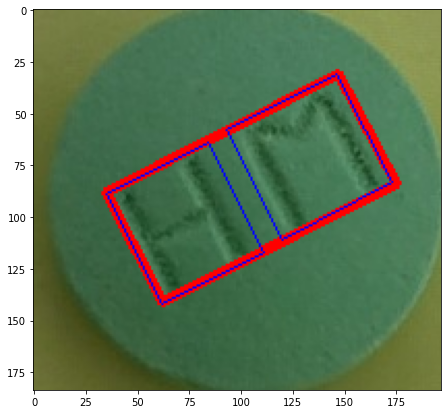

In [ ]:
path = os.getcwd() + '/images/test_1.jpg'
detect_text(path)

Texts:
T2
T2
text_bounds: (85,124),(343,112),(350,260),(92,272)
Symbols: 
T
2
symbols_bounds:  [[(85, 125), (214, 119), (221, 266), (92, 272)], [(232, 117), (343, 112), (350, 259), (239, 264)]]


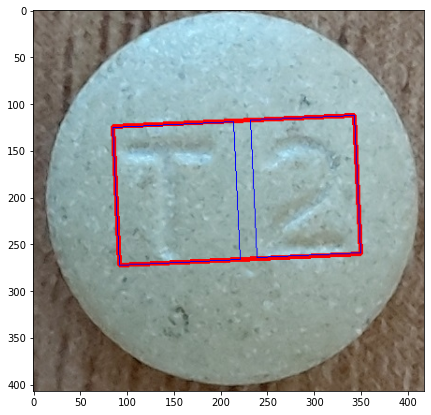

In [ ]:
path = os.getcwd() + '/images/test_2.jpg'
detect_text(path)

Texts:
AAP
AAP
text_bounds: (419,196),(337,183),(344,137),(426,150)
Symbols: 
A
A
P
symbols_bounds:  [[(419, 196), (394, 192), (402, 147), (426, 151)], [(386, 190), (363, 186), (370, 141), (393, 145)], [(359, 186), (337, 183), (344, 137), (366, 141)]]


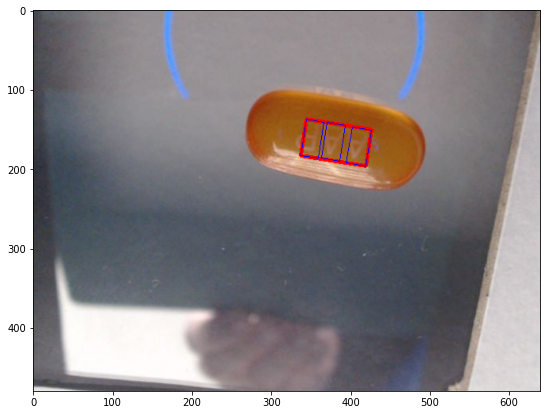

In [ ]:
path = os.getcwd() + '/images/webcam/ace5.jpg'
detect_text(path)

Texts:
F7
F7
text_bounds: (248,243),(182,187),(206,158),(272,215)
Symbols: 
F
7
symbols_bounds:  [[(248, 243), (220, 219), (244, 191), (272, 215)], [(210, 211), (182, 187), (206, 159), (234, 183)]]


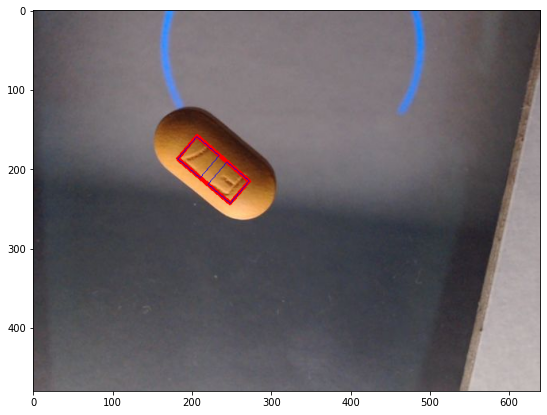

In [ ]:
path = os.getcwd() + '/images/webcam/AZP1.jpg'
detect_text(path)

Texts:
KDP
KDP
text_bounds: (373,245),(428,212),(438,230),(383,262)
Symbols: 
K
D
P
symbols_bounds:  [[(374, 246), (391, 236), (401, 252), (384, 262)], [(392, 234), (410, 223), (420, 240), (402, 250)], [(412, 222), (428, 212), (438, 229), (422, 238)]]


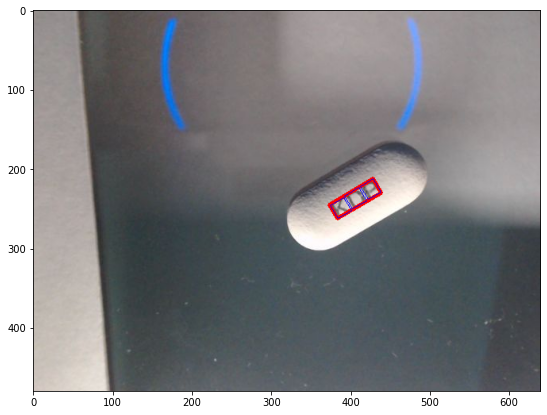

In [ ]:
path = os.getcwd() + '/images/webcam/HDC1.jpg'
detect_text(path)

Texts:
TYLENOL
TYLENOL
Symbols: 
T
Y
L
E
N
O
L
symbols_bounds:  [[(251, 201), (273, 192), (286, 224), (264, 233)], [(271, 192), (295, 182), (308, 214), (284, 224)], [(295, 182), (314, 174), (327, 206), (308, 214)], [(315, 174), (338, 165), (351, 196), (328, 206)], [(338, 165), (363, 155), (376, 186), (351, 197)], [(361, 156), (387, 146), (400, 177), (374, 188)], [(388, 145), (408, 137), (421, 168), (401, 177)]]


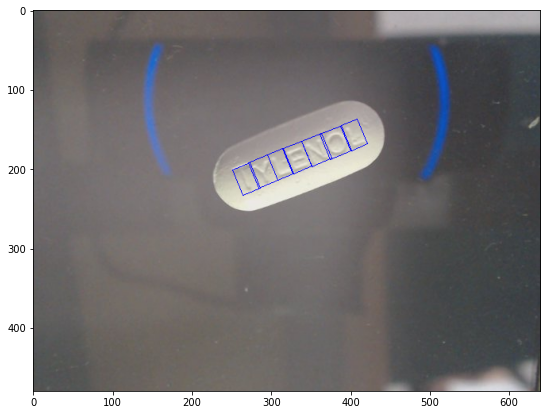

In [ ]:
path = os.getcwd() + '/images/webcam/9.jpg'
detect_char(path)

Texts:
KDP
KDP
Symbols: 
K
D
P
symbols_bounds:  [[(61, 95), (78, 85), (89, 104), (72, 114)], [(80, 83), (98, 73), (109, 92), (91, 102)], [(101, 71), (118, 62), (128, 81), (112, 90)]]


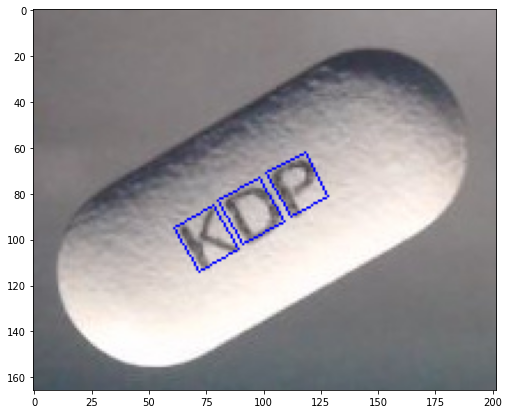

In [ ]:
path = os.getcwd() + '/images/webcam/H1.jpg'
detect_char(path)

# 표시앞 또는 표시뒤(단어) -> 약 식별

In [ ]:
import pandas as pd

data = pd.read_excel(os.getcwd() +'/data.xlsx', engine = 'openpyxl')
data

,Classes,TTS,품목명,성상,표시,의약품제형,색상앞,제형코드명
0,0,Sohazyme Plus Tab,소하자임플러스정,녹색의 원형 필름코팅정제,HM,원형,연두,필름코팅정
1,1,Tylenol,타이레놀정500밀리그람(아세트아미노펜),흰색의 장방형 필름코팅정제,TYLENOL500,장방형,하양,필름코팅정
2,2,azp,아진팜정,주황색의 장방형 필름코팅정,F7,장방형,주황,정제형
3,3,Raniwell,라니웰정,황색의 원형 필름코팅정,RW,원형,주황,필름코팅정
4,4,Ace,이지엔6에이스연질캡슐(아세트아미노펜),미황색의 투명한 액이 든 주황색의 투명한 장방형 연질캡슐,AAP,타원형,"주황, 투명","연질캡슐제, 액상"
5,5,HardiCo,하디코정,백색의 장방형 필름코팅정제,KDP,장방형,백색,필름코팅정
6,6,EZN6any,이지엔6애니연질캡슐(이부프로펜),무색 내지 연한 청록색의 투명한 내용물을 함유한 연청록색의 투명한 타원형 연질캡슐제,ANY,타원형,"청록, 투명","연질캡슐제, 액상"
7,7,Yovishin,아이월드요비신정,황갈색의 원형 필름코팅정,T2,원형,갈색,필름코팅정
8,8,PAXSC,페인엔젤레이디연질캡슐,무색의 투평한 액이 든 분혹색의 투명한 타원형 연질캡슐,페인엔젤L,타원형,"분홍, 투명","연질캡슐제, 액상"
9,9,NaN,트리페린정,NaN,ALPHAPHARM,NaN,NaN,NaN


# 앞뒤 이미지에서 읽은 글자들 리스트화

In [ ]:
os.getcwd()

'/content/gdrive/MyDrive/Colab Notebooks/Hackathon'

In [ ]:
import glob
loc=glob.glob('./images/webcam/ty*.jpg')    # front, back image reading

In [ ]:
loc

['./images/webcam/ty3.jpg', './images/webcam/ty2.jpg']

In [ ]:
def gathering_symbols(loc):
  client = vision.ImageAnnotatorClient()
  result = []
  for path in loc:
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)
    response = client.text_detection(image=image)

    try:
      symbols = response.full_text_annotation.pages[0].blocks[0].paragraphs[0].words[0].symbols
      for symbol in symbols:
        result.append(symbol.text)
    except: IndexError

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
        
  return result

In [ ]:
gathering_symbols(loc)

['T', 'O', 'N', 'E', 'R', 'A', 'L']

In [ ]:
chars = gathering_symbols(loc)
pills_rank = [1,4,2,5,4,1,2,5]    # YOLO가 낸 ranking
YOLO = []
DICT = {}

for i in pills_rank:
  if i not in YOLO:
    YOLO.append(i)

for i in YOLO:
  count = 0
  for char in chars:
    if char in list(data['표시'][i]):
      count+=1
  score = count/len(list(data['표시'][i]))
  DICT[i] = score
DICT

{1: 0.5, 2: 0.0, 4: 0.3333333333333333, 5: 0.0}

In [ ]:
answer = max(DICT, key=DICT.get)
answer

1

In [ ]:
print(gathering_symbols(loc))
print(DICT)
print(answer)

['T', 'O', 'N', 'E', 'R', 'A', 'L']
{1: 0.5, 4: 0.3333333333333333, 2: 0.0, 5: 0.0}
1


# 포장지로 읽기

In [ ]:
# 단어 단위, 글자 단위, detect 결과 및 bounding box 출력 함수
def detect_text(path):
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    print('Texts:')
    for text in texts:
       print(text.description)

    vertices1 = (['({},{})'.format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])

    print('text_bounds: {}'.format(','.join(vertices1)))
    pts1 = np.array([[vertex.x,vertex.y] for vertex in text.bounding_poly.vertices], np.int32)
    cv2.polylines(img, [pts1], True, (255,0,0), 3)
    
    symbols = response.full_text_annotation.pages[0].blocks[0].paragraphs[0].words[0].symbols
    print('Symbols: ')
    vertices2 = []
    
    for symbol in symbols:
        print(symbol.text)
        vertices2.append(([(vertex.x, vertex.y) for vertex in symbol.bounding_box.vertices]))
    print('symbols_bounds: ',vertices2)
    
    for vertices in vertices2:
        pts2 = np.array([[vertex[0],vertex[1]] for vertex in vertices], np.int32)
        cv2.polylines(img, [pts2], True, (0,0,255), 1)

    plt.figure(figsize=(14,7))
    plt.imshow(img)
    plt.show()

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
path = os.getcwd() +'/images/cover_1.jpg'

with io.open(path, 'rb') as image_file:
  content = image_file.read()

image = vision.Image(content=content)
response = client.text_detection(image=image)
texts = response.text_annotations
print(texts[0].description)

4양약품
LYAN
호과 소한제
3종회과 소화제
3중
아진팜
INPAM tab OF4, A
상의생의 1회 1정 1일 3회
@일양약품
호정 1일 8회)
중과 소화제
DAM tab
1청 19
PH
RO



In [ ]:
path = os.getcwd() +'/images/cover_2.jpg'

with io.open(path, 'rb') as image_file:
  content = image_file.read()

image = vision.Image(content=content)
response = client.text_detection(image=image)
texts = response.text_annotations
print(texts[0].description)

각 (주)
y하게 누르세요
광동세약(주)
전용기 모켓부분을 강하게 누르세요
광동세약(주)
안전용기 포켓부분을 장하게 누르세요
광동세약(주)
안전용기 포켓부분을올 강이게 누르세요
힘/재차기
1약(주)
J하게 누르세요
물|코막힘/ 재채기:
광동재약(주):
조부부을 강하게 누르세요.
하디코정
|콧물 /코막힘/ 재채기
|광동제약(주)
안천용기 모켓부분을 게 누르세요
하디코정
|콧물 / 코막힘/ 재체기
|광동제약(주)
안전용가 포켓부분을 강하게 누르세요
안전용기
하디코
하디코
|器/叫/1
광동제약(주)
안전용기
하디코정
롯물(코믹힘/재체기
광동세약(주)
인전광기 보켓부분을 강하게누르세요
/약 (주)
J하게 누르세요.
광동제약(주)
안전용기 모켓우분을에 두르세요
안전용기
하디코정
|콧물 / 코믹헴/ 재채기
광동제약(주)
안전용기 포켓부분을김하로요
하디코정
곳물 /코막힘/제체기
광동제약 주)
안전용기 켓부분을 강수은세요.
1악(주)
아에 누르시요!
생동제약
롯부분을 강하게 누 세요.
안전용기



In [ ]:
texts[0].description

'부분을 강하게(\n빠른 엑상형 열·소역진제\n이지엔6 에니\nONHL\n1일 3-4회 1회 1캡슐\nR 대응제약\n'

In [ ]:
(texts[0].description.split('\n'))

list

In [ ]:
results = texts[0].description.split('\n')
label = data['품목명']
for idx, text in enumerate(label):
  for i in results:
    if i == text:
      print(label[idx])
      break

하디코정


In [ ]:
path = os.getcwd() +'/images/cover_3.jpg'

with io.open(path, 'rb') as image_file:
  content = image_file.read()

image = vision.Image(content=content)
response = client.text_detection(image=image)
texts = response.text_annotations
print(texts[0].description)

IL
부정(부기)
방광카타로, 신장병
요비신정



In [ ]:
path = os.getcwd() +'/images/cover_4.jpg'

with io.open(path, 'rb') as image_file:
  content = image_file.read()

image = vision.Image(content=content)
response = client.text_detection(image=image)
texts = response.text_annotations
print(texts[0].description)

부분을 강하게(
빠른 엑상형 열·소역진제
이지엔6 에니
ONHL
1일 3-4회 1회 1캡슐
R 대응제약

